# 19

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 51. N-Queens

Hard

The n-queens puzzle is the problem of placing n queens on an n×n chessboard such that no two queens attack each other.

Given an integer n, return all distinct solutions to the n-queens puzzle.

Each solution contains a distinct board configuration of the n-queens' placement, where 'Q' and '.' both indicate a queen and an empty space respectively.

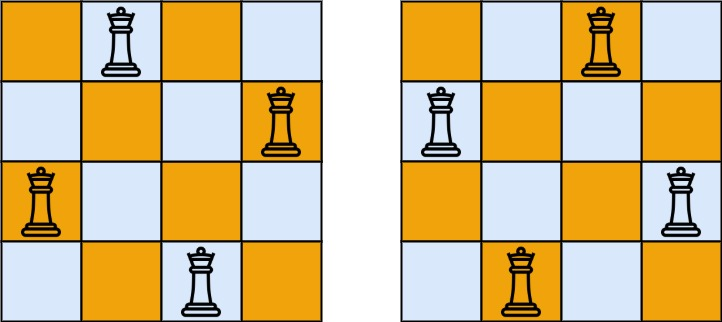

    Example:

    Input: 4
    Output: [
     [".Q..",  // Solution 1
      "...Q",
      "Q...",
      "..Q."],

     ["..Q.",  // Solution 2
      "Q...",
      "...Q",
      ".Q.."]
    ]
    Explanation: There exist two distinct solutions to the 4-queens puzzle as shown above.



In [5]:
# clean solution from LeetCode
# res = list of solutions,  [[1, 3, 0, 2], [2, 0, 3, 1]] for n=4, 
# Each solution is a list of j indices of the queen placement at each row. 

# cols, diag, and off_diag: lists of indices that have already been occupied. 
# dfs 需要知道整個 board 當前的狀態。cols, diag, and off_diag 是這個狀態抽象化的結果

n = 4

def solveNQueens(n):
    def dfs(cols, diag, off_diag):
        i = len(cols)
        if i == n:
            res.append(cols)
            return
        for j in range(n):
            if j not in cols and j-i not in diag and j+i not in off_diag:
                dfs(cols+[j], diag+[j-i], off_diag+[j+i])
                
    res = []
    dfs([], [], []) 
    return [['.'*j + 'Q' + '.'*(n-j-1) for j in sol] for sol in res]

solveNQueens(n)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]

## 986. Interval List Intersections
Medium

Given two lists of closed intervals, each list of intervals is pairwise disjoint and in sorted order.

Return the intersection of these two interval lists.

(Formally, a closed interval [a, b] (with a <= b) denotes the set of real numbers x with a <= x <= b.  The intersection of two closed intervals is a set of real numbers that is either empty, or can be represented as a closed interval.  For example, the intersection of [1, 3] and [2, 4] is [2, 3].)

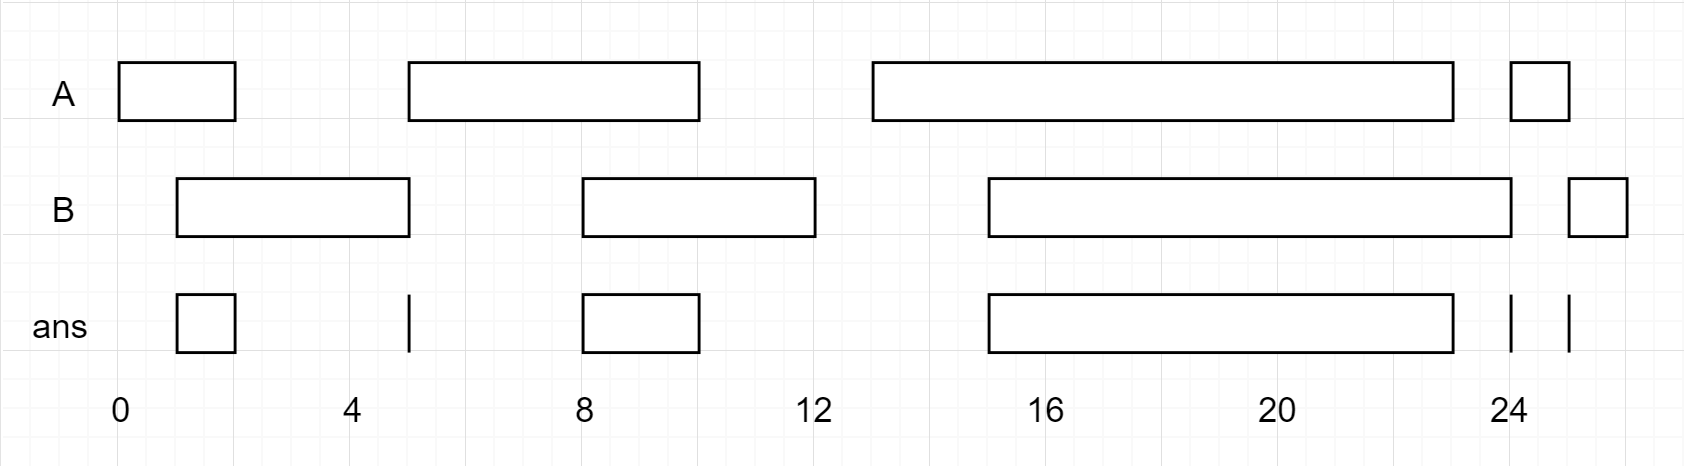

    Example:

    Input: A = [[0,2],[5,10],[13,23],[24,25]], B = [[1,5],[8,12],[15,24],[25,26]]
    Output: [[1,2],[5,5],[8,10],[15,23],[24,24],[25,25]]



In [1]:
# my solution，如果要改開區間，把 no overlap 兩個條件都改成 <=

A = [[0, 2], [5, 10], [13, 23], [24, 25]]
B = [[1, 5], [8, 12], [15, 24], [25, 26]]

def intervalIntersection(A, B):
    i = j = 0
    res = []
    while i<len(A) and j<len(B):
        if A[i][1] < B[j][0]:  # no overlap
            i += 1
        elif B[j][1] < A[i][0]:  # no overlap
            j += 1
        else:                   # there is overlap
            
            s = max(A[i][0], B[j][0])

            if A[i][1] <= B[j][1]:
                res.append([s, A[i][1]])
                i += 1
            else:
                res.append([s, B[j][1]])
                j += 1
                
    return res

intervalIntersection(A, B)

[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

In [6]:
# 花花醬解答，如果要改成開區間就用 s < e

A = [[0, 2], [5, 10], [13, 23], [24, 25]]
B = [[1, 5], [8, 12], [15, 24], [25, 26]]

def intervalIntersection(A, B):
    i = j = 0
    res = []
    while i<len(A) and j<len(B):
        s = max(A[i][0], B[j][0])
        e = min(A[i][1], B[j][1])
        if s <= e:
            res.append([s, e])
            
        if A[i][1] < B[j][1]:
            i += 1
        else:
            j += 1
        
    return res
            
intervalIntersection(A, B) 

[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

## 969. Pancake Sorting
Medium

Given an array of integers arr, sort the array by performing a series of pancake flips.

In one pancake flip we do the following steps:

    Choose an integer k where 1 <= k <= arr.length.
    Reverse the sub-array arr[1...k].

For example, if arr = [3,2,1,4] and we performed a pancake flip choosing k = 3, we reverse the sub-array [3,2,1], so arr = [1,2,3,4] after the pancake flip at k = 3.

Return the k-values corresponding to a sequence of pancake flips that sort arr. Any valid answer that sorts the array within 10 * arr.length flips will be judged as correct.


    Example:
    
    Input: arr = [3,2,4,1]
    Output: [4,2,4,3]
    Explanation: 
    We perform 4 pancake flips, with k values 4, 2, 4, and 3.
    Starting state: arr = [3, 2, 4, 1]
    After 1st flip (k = 4): arr = [1, 4, 2, 3]
    After 2nd flip (k = 2): arr = [4, 1, 2, 3]
    After 3rd flip (k = 4): arr = [3, 2, 1, 4]
    After 4th flip (k = 3): arr = [1, 2, 3, 4], which is sorted.
    Notice that we return an array of the chosen k values of the pancake flips.


In [11]:
# 假設排序過的 list 是 [1, 2, 3, ..., n]
# 這份 code 成功跑過了 LeetCode 所有的 test case

arr = [3, 2, 4, 1]

def pancakeSort(arr):
    n = len(arr)
    res = []
    
    for i in range(n, 1, -1):
        k = arr.index(i) + 1
        if k != 1:
            res.append(k)
            arr[:k] = arr[:k][::-1]    
        res.append(i)
        arr[:i] = arr[:i][::-1]
        
    return res

pancakeSort(arr)

[3, 4, 2, 3, 2]

## 200. Number of Islands
Medium

Given a 2d grid map of '1's (land) and '0's (water), count the number of islands. An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

    Example: 
    
    Input: grid = [
        ['1', '1', '0', '0', '0'],
        ['1', '1', '0', '0', '0'],
        ['0', '0', '1', '0', '0'],
        ['0', '0', '0', '1', '1']
    ]
    Output: 1


In [8]:
grid = [
    ['1', '1', '0', '0', '0'],
    ['1', '1', '0', '0', '0'],
    ['0', '0', '1', '0', '0'],
    ['0', '0', '0', '1', '1']
]

def numIslands(grid):
    if not grid: return 0
    else:
        m = len(grid)
        n = len(grid[0])

        def paint(i, j):
            grid[i][j] = '0'
            if i!=0   and grid[i-1][j]=='1':  paint(i-1, j)
            if i!=m-1 and grid[i+1][j]=='1':  paint(i+1, j)
            if j!=0   and grid[i][j-1]=='1':  paint(i, j-1)
            if j!=n-1 and grid[i][j+1]=='1':  paint(i, j+1)

        count = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '1':
                    paint(i, j)
                    count +=1

        return count

numIslands(grid)

3

## 560. Subarray Sum Equals K
Medium

Given an array of integers and an integer k, you need to find the total number of continuous subarrays whose sum equals to k.


    Example:
    
    Input:nums = [1,1,1], k = 2
    Output: 2


In [1]:
from collections import defaultdict

# nums = [-1, -1, 1]
# k = 0

nums = [1, 1, 1]
k = 2

def subarraySum(nums, k):
    cumsumCount = defaultdict(int)
    cumsumCount[0] = 1
    curSum = 0
    res = 0

    for i, n in enumerate(nums):
        curSum += n
        res += cumsumCount.get(curSum-k, 0)  # 一定要放在 update 字典之前不然遇到 k=0 的情況會把自己算進去
        cumsumCount[curSum] += 1

    return res

subarraySum(nums, k)

2

## 64. Minimum Path Sum
Medium

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

    Example:
    
    Input:
    [
      [1,3,1],
      [1,5,1],
      [4,2,1]
    ]
    Output: 7
    Explanation: Because the path 1→3→1→1→1 minimizes the sum.


In [2]:
grid = [
    [1, 3, 1], 
    [1, 5, 1], 
    [4, 2, 1]
]

def minPathSum(grid):
    m = len(grid)
    n = len(grid[0])
    
    for i in range(1, m):
        grid[i][0] += grid[i-1][0] 
        
    for j in range(1, n):
        grid[0][j] += grid[0][j-1] 
    
    for i in range(1, m):
        for j in range(1, n):
            grid[i][j] += min(grid[i-1][j], grid[i][j-1])
        
    return grid[-1][-1]
    
minPathSum(grid)

7

## 47. Permutations II
Medium

Given a collection of numbers that might contain duplicates, return all possible unique permutations.


    Example:
    
    Input: [1,1,2]
    Output:
    [
      [1,1,2],
      [1,2,1],
      [2,1,1]
    ]


In [3]:
nums = [3, 3, 5]

def permuteUnique(nums):
    if not nums:
        return [nums]
    else:
        idx = {}
        for i, n in enumerate(nums):
            if n not in idx:
                idx[n] = i

        res = []
        for n, i in idx.items():
            for l in permuteUnique(nums[:i] + nums[i+1:]):
                res.append([n]+l)

        return res

permuteUnique(nums)

[[3, 3, 5], [3, 5, 3], [5, 3, 3]]

## 15. 3Sum
Medium

Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0? Find all unique triplets in the array which gives the sum of zero.

Notice that the solution set must not contain duplicate triplets.


    Example:
    
    Input: nums = [-1,0,1,2,-1,-4]
    Output: [[-1,-1,2],[-1,0,1]]


In [18]:
nums = [-1, 0, 1, 2, -1, -4]

def threeSum(nums):
    nums = sorted(nums)
    n = len(nums)
    i = 0
    j = 1
    k = n-1
    
    res = []
    for i in range(n-2):
        if i > 0 and nums[i] == nums[i-1]:    # skip duplicate numbers
            continue
            
        j = i+1
        k = n-1
        while j<k:
            s = nums[i] + nums[j] + nums[k]
            if s > 0:    k -= 1
            elif s < 0:  j += 1
            elif s == 0: 
                res.append([nums[i], nums[j], nums[k]])
                while j < k and nums[j] == nums[j+1]:     # skip duplicate numbers
                    j += 1
                while j < k and nums[k] == nums[k-1]:     # skip duplicate numbers
                    k -= 1
                j += 1
                k -= 1  
    return res

threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

In [ ]:
# solution making use of two sum; slow but will pass

nums = [-1, 0, 1, 2, -1, -4]

def twoSum(nums, target):
    '''
    This is a stronger version of twoSum that can handle multiple solutions as well as no solution
    '''
    allSln = set([])
    s = set([])
    for n in nums:
        if target - n in s:
            allSln.add((n, target-n))
        s.add(n)

    return allSln

def threeSum(nums):
    res = set([])
    for i, a in enumerate(nums):
        for b, c in twoSum(nums[i+1:], -a):
            res.add(tuple(sorted([a, b, c])))

    return [list(sln) for sln in res]

# twoSum([1, 7, 5, 5, 4, 4, 4, 4, 5, 3, 3], 8)
# twoSum([1, 2], 8)

threeSum(nums)

## 104. Maximum Depth of Binary Tree
Easy

Given a binary tree, find its maximum depth.

The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

Note: A leaf is a node with no children.


    Example:
    
    Given binary tree [3,9,20,null,null,15,7],

        3
       / \
      9  20
        /  \
       15   7

    return its depth = 3.



In [5]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def maxDepth(root):
    if root==None:
        return 0
    else:
        return 1 + max(maxDepth(root.left), maxDepth(root.right))

## 344. Reverse String
Easy

Write a function that reverses a string. The input string is given as an array of characters char[].

Do not allocate extra space for another array, you must do this by modifying the input array in-place with O(1) extra memory.

You may assume all the characters consist of printable ascii characters.


    Example:
    
    Input: ["h","e","l","l","o"]
    Output: ["o","l","l","e","h"]


In [12]:
s = ['h', 'e', 'l', 'l', 'o']

def reverseString(s):
    n = len(s)
    for i in range(n//2):
        s[i], s[-i-1] = s[-i-1], s[i]

reverseString(s)
s

['o', 'l', 'l', 'e', 'h']

## 53. Maximum Subarray
Easy

Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

Follow up: If you have figured out the O(n) solution, try coding another solution using the divide and conquer approach, which is more subtle.


    Example:
    
    Input: nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
    Output: 6


In [1]:
nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

def maxSubArray(nums):
    maxSum = curMax = nums[0]
    for i  in range(1, len(nums)):
        curMax = max(nums[i], curMax + nums[i])
        maxSum = max(curMax, maxSum)
        
    return maxSum

def maxSubArray_(nums):
    '''Can use solution of 121 Best Time to Buy and Sell Stock because profit is sum of daily PnLs from consecutive days'''
    
    import numpy as np
    return maxProfit(np.cumsum(nums))

maxSubArray(nums)

6

## 1. Two Sum
Easy

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.


    Example:
    
    Input: nums = [2,7,11,15], target = 9
    Output: [0,1]


In [10]:
nums = [2, 7, 11, 15]
target = 9

def twoSum(nums, target):
    d = {}
    for idx, n in enumerate(nums):
        if target - n in d:
            return [d[target - n], idx]
        else:
            d[n] = idx

twoSum(nums, target)

[0, 1]